In [4]:
# import packages

import re
import string
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geopy import geocoders

# SpaCy has own Stop Words (useless words for analysis) dicitonary to use for removal.
from spacy.lang.en.stop_words import STOP_WORDS

# A scikit-learn combatible visualizer for word frequency
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For later sentence scoring
from heapq import nlargest


In [5]:
# Load spacy English tokenizer, tagger, parser,and  word vectors
nlp = spacy.load('en')

# Initialize stopwords variable with spacy
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Load in text/whole documents and create Doc nlp object
input_str = open("wiki.txt").read() # full text -- enter path to txt HERE
article_1 = input_str[:42689] # segment first full article for analysis
doc = nlp(article_1) # create doc object for article

In [6]:
# Print Original Article
print()
print("\033[1m" + 'Original Article: ' + "\033[0m" + '%s' % (article_1[:250])) # adjust article display length accordingly
print()
print("____________________________________")
print()



Original Article: 
Anarchism:
Anarchism is an anti-authoritarian political philosophy that rejects hierarchies deemed unjust and advocates their replacement with self-managed, self-governed societies based on voluntary, cooperative institutions. These institutions are

____________________________________



In [7]:
# create dictionaries
word_frequencies2 = {}
word_frequencies_dist = {}
entities = {}
sentence_scores = {}

In [9]:
# text preprocessing
s = article_1.lower() # convert string to lowercase for simplicity
s = re.sub(r' \d+', '', article_1) # remove numbers from string
s = article_1.translate(str.maketrans("", "", string.punctuation)) # remove special characters from string
tokens = nlp(s) # tokenize - split string into words
tokens = [t for t in tokens if len(t) > 2] # remove short words
tokens = [t for t in tokens if t not in stopwords] # remove stop words

In [10]:
# Print tokens of original article
print("\033[1m" + 'Tokens:' + "\033[0m", tokens)
print()
print("____________________________________")
print()

# Print Recognized noun phrases from text
print("\033[1m" + "Noun phrases:" + "\033[0m", [chunk.text for chunk in doc.noun_chunks])

# Print Recognized verbs from text
print("\033[1m" + "Verbs:" + "\033[0m", [token.lemma_ for token in doc if token.pos_ == "VERB"])
print()
print("____________________________________")
print()


Tokens: [Anarchism, Anarchism, antiauthoritarian, political, philosophy, that, rejects, hierarchies, deemed, unjust, and, advocates, their, replacement, with, selfmanaged, selfgoverned, societies, based, voluntary, cooperative, institutions, These, institutions, are, often, described, stateless, societies, although, several, authors, have, defined, them, more, specifically, distinct, institutions, based, nonhierarchical, free, associations, Anarchisms, central, disagreement, with, other, ideologies, that, holds, the, state, undesirable, unnecessary, and, harmful, Anarchism, usually, placed, the, farleft, the, political, spectrum, and, much, its, economics, and, legal, philosophy, reflect, antiauthoritarian, interpretations, communism, collectivism, syndicalism, mutualism, participatory, economics, anarchism, does, not, offer, fixed, body, doctrine, from, single, particular, worldview, many, anarchist, types, and, traditions, exist, and, varieties, anarchy, diverge, widely, Anarchist, s

In [11]:
# Find named entities, phrases and concepts
for entity in doc.ents:
    entities.update({entity.text: entity.label_})

# Location-specific entity locations dictionary
entity_locations = dict()

for k, v in entities.items():
    if v == 'LOC' or v == 'GPE':
        geolocator = geocoders.GoogleV3(api_key='') # enter API key HERE
        location_info = geolocator.geocode(k, timeout=100)
        entity_locations.update({k : location_info})


/Users/rluria/anaconda3/envs/nlptest_100/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Since July 2018 Google requires each request to have an API key. Pass a valid `api_key` to GoogleV3 geocoder to hide this warning. See https://developers.google.com/maps/documentation/geocoding/usage-and-billing
  # Remove the CWD from sys.path while we load stuff.


GeocoderQueryError: Your request was denied.

In [12]:
# Print Entities
print("\033[1m" + "Entities: " + "\033[0m", entities)
print("\033[1m" + "Location-specific Entities: " + "\033[0m", entity_locations)
print()
print("____________________________________")
print()

Entities:  {'Greek': 'NORP', 'Anarkhia': 'PERSON', 'first': 'ORDINAL', '1642': 'DATE', 'the French Revolution': 'EVENT', 'the early 19th century': 'DATE', 'William Godwin': 'PERSON', 'Wilhelm Weitling': 'PERSON', 'Pierre-Joseph Proudhon': 'PERSON', 'the mid-19th century': 'DATE', 'the 1890s': 'DATE', 'France': 'GPE', 'the United States': 'GPE', 'China': 'GPE', 'Greece': 'GPE', 'Taoist': 'NORP', 'Zhuangzi': 'PERSON', 'Lao Tzu': 'PERSON', 'Sophocles': 'NORP', 'Antigone': 'GPE', 'Athenian': 'NORP', 'the Middle Ages': 'DATE', 'Islamic': 'NORP', 'Christian Europe': 'LOC', 'Persia': 'GPE', 'Zoroastrian Prophet': 'PERSON', 'Mazdak': 'PERSON', 'Basra': 'GPE', 'Europe': 'LOC', 'the centuries': 'DATE', 'Renaissance': 'ORG', 'Enlightenment': 'PERSON', 'Classical': 'PERSON', 'Enragés': 'GPE', 'the Spanish Civil War': 'EVENT', '1936': 'DATE', 'England': 'GPE', "Max Stirner's": 'PERSON', "Pierre-Joseph Proudhon's": 'PERSON', 'Michael Bakunin': 'PERSON', 'Jura Federation': 'ORG', "the International W

In [13]:
# Build word frequency dictionary
for t in tokens:
    if t.text not in stopwords:
        if len(t.text) > 2:
            if t.text not in word_frequencies2.keys():
                word_frequencies2[t.text] = 1
            else:
                word_frequencies2[t.text] += 1


In [14]:
# Print Word Frequency Table
print("\033[1m" + "Word Frequency:" + "\033[0m", sorted(word_frequencies2.items(), key=lambda x: x[1], reverse=True))

Word Frequency: [('anarchism', 99), ('anarchist', 60), ('state', 34), ('anarchists', 32), ('The', 30), ('movement', 22), ('social', 20), ('society', 19), ('free', 16), ('thought', 16), ('form', 16), ('workers', 16), ('individualist', 15), ('political', 14), ('based', 14), ('schools', 13), ('movements', 13), ('violence', 13), ('known', 12), ('Anarchism', 11), ('Anarchist', 11), ('century', 11), ('War', 11), ('International', 11), ('Revolution', 10), ('currents', 10), ('Spanish', 10), ('philosophy', 9), ('ideas', 9), ('theory', 9), ('class', 9), ('Anarchists', 9), ('struggle', 9), ('important', 9), ('labour', 9), ('use', 8), ('Proudhon', 8), ('libertarian', 8), ('human', 8), ('according', 8), ('Civil', 8), ('revolutionary', 8), ('different', 8), ('revolution', 8), ('action', 8), ('Stirner', 8), ('education', 8), ('economics', 7), ('French', 7), ('Godwin', 7), ('States', 7), ('During', 7), ('philosophical', 7), ('tendencies', 7), ('collectivist', 7), ('organisation', 7), ('property', 7), 

In [15]:
# Find Maximum Word Frequency
maximum_frequency = max(word_frequencies2.values())

for word in word_frequencies2.keys():
    word_frequencies_dist[word] = (word_frequencies2[word] / maximum_frequency)

In [16]:
# Print Weighted Frequency Table Distribution
print("\033[1m" + "Weighted Word Frequency Distribution:" + "\033[0m",
        sorted(word_frequencies_dist.items(), key=lambda x: x[1], reverse=True))
print()
print("____________________________________")
print()


Weighted Word Frequency Distribution: [('anarchism', 1.0), ('anarchist', 0.6060606060606061), ('state', 0.3434343434343434), ('anarchists', 0.32323232323232326), ('The', 0.30303030303030304), ('movement', 0.2222222222222222), ('social', 0.20202020202020202), ('society', 0.1919191919191919), ('free', 0.16161616161616163), ('thought', 0.16161616161616163), ('form', 0.16161616161616163), ('workers', 0.16161616161616163), ('individualist', 0.15151515151515152), ('political', 0.1414141414141414), ('based', 0.1414141414141414), ('schools', 0.13131313131313133), ('movements', 0.13131313131313133), ('violence', 0.13131313131313133), ('known', 0.12121212121212122), ('Anarchism', 0.1111111111111111), ('Anarchist', 0.1111111111111111), ('century', 0.1111111111111111), ('War', 0.1111111111111111), ('International', 0.1111111111111111), ('Revolution', 0.10101010101010101), ('currents', 0.10101010101010101), ('Spanish', 0.10101010101010101), ('philosophy', 0.09090909090909091), ('ideas', 0.090909090

In [17]:
# Sentence Score and Ranking of Words in each sentence
# This scores every sentence based on number of non-stopwords

# Sentence Tokens
sentence_list = [sentence for sentence in doc.sents]

# Sentence Score via comparing each word with sentence

for sent in sentence_list:
    for word in sent:
        if word.text.lower() in word_frequencies_dist.keys():
            if len(sent.text.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies_dist[word.text.lower()]
                else:
                    sentence_scores[sent] += word_frequencies_dist[word.text.lower()]

In [18]:
# Print Sentence Scores
print("\033[1m" + "Sentence Scores:" + "\033[0m", sentence_scores)
print()
print("____________________________________")
print()

Sentence Scores: {
Anarchism:
: 1.0, Anarchism is an anti-authoritarian political philosophy that rejects hierarchies deemed unjust and advocates their replacement with self-managed, self-governed societies based on voluntary, cooperative institutions.: 1.7070707070707072, These institutions are often described as stateless societies, although several authors have defined them more specifically as distinct institutions based on non-hierarchical or free associations.: 0.6161616161616162, Anarchism's central disagreement with other ideologies is that it holds the state to be undesirable, unnecessary, and harmful.
: 1.474747474747475, As anarchism does not offer a fixed body of doctrine from a single particular worldview, many anarchist types and traditions exist and varieties of anarchy diverge widely.: 1.9090909090909098, Anarchist schools of thought can differ fundamentally, supporting anything from extreme individualism to complete collectivism.: 1.0606060606060608, Strains of anarchi

In [19]:
# Finding top N sentence with largest score
summarized_sentences = nlargest(7, sentence_scores, key=sentence_scores.get)

# List Comprehension of Sentences Converted From Spacy.span to strings
final_sentences = [w.text for w in summarized_sentences]

# Spacy Summary of text
summary = ' '.join(final_sentences)

In [20]:
# Print SpaCy Summary
print("\033[1m" + "Spacy Summary:" + "\033[0m", summary)
print("____________________________________")
print()


Spacy Summary: An influential form of individualist anarchism called egoism, or egoist anarchism, was expounded by one of the earliest and best-known proponents of individualist anarchism, the German Max Stirner. Synthesis anarchism is a form of anarchism that tries to join anarchists of different tendencies under the principles of anarchism without adjectives. Anarchist schools of thought had been generally grouped in two main historical traditions (individualist anarchism and social anarchism) which have some different origins, values and evolution. Insurrectionary anarchism is a revolutionary theory, practice and tendency within the anarchist movement which emphasises insurrection within anarchist practice. On the other hand, some use libertarianism to refer to individualistic free-market philosophy only, referring to free-market anarchism as libertarian anarchism.
 Collectivist anarchism, also referred to as revolutionary socialism or a form of such, is a revolutionary form of anar

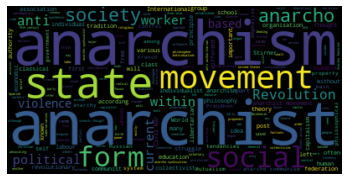

In [21]:
# Produce WordCloud for visual representation of word frequency
wordcloud = WordCloud().generate(article_1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()